In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [2]:
data = pickle.load( open( "pickles/a3.p", "rb" ) )

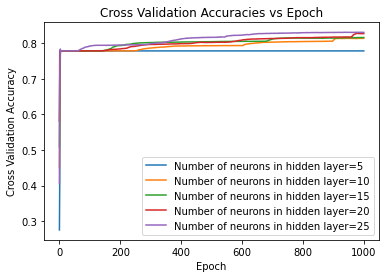

In [3]:
plt.plot(data['model_5'])
plt.plot(data['model_10'])
plt.plot(data['model_15'])
plt.plot(data['model_20'])
plt.plot(data['model_25'])
plt.title('Cross Validation Accuracies vs Epoch')
plt.ylabel('Cross Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Number of neurons in hidden layer=5', 'Number of neurons in hidden layer=10', 'Number of neurons in hidden layer=15', 'Number of neurons in hidden layer=20', 'Number of neurons in hidden layer=25'], loc='lower right')
plt.show()

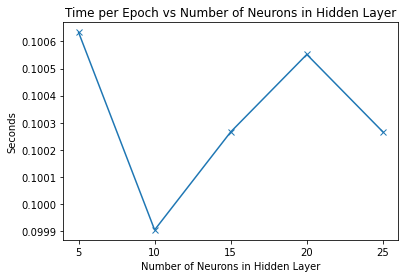

In [4]:
x=[5,10,15,20,25]
plt.plot(x, data['timings'], marker='x')
plt.xticks(np.arange(min(x), max(x)+1, 5))
plt.title('Time per Epoch vs Number of Neurons in Hidden Layer')
plt.ylabel('Seconds')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.show()

In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [7]:
accuracies_over_time = []
accuracies_over_time.append(("5", data['model_5'][-1]/data['timings'][0], data['model_5'][-1], data['timings'][0], pd.to_timedelta(data['timings'][0]*5000, unit='S')))
accuracies_over_time.append(("10", data['model_10'][-1]/data['timings'][1], data['model_10'][-1], data['timings'][1], pd.to_timedelta(data['timings'][1]*5000, unit='S')))
accuracies_over_time.append(("15", data['model_15'][-1]/data['timings'][2], data['model_15'][-1], data['timings'][2], pd.to_timedelta(data['timings'][2]*5000, unit='S')))
accuracies_over_time.append(("20", data['model_20'][-1]/data['timings'][3], data['model_20'][-1], data['timings'][3], pd.to_timedelta(data['timings'][3]*5000, unit='S')))
accuracies_over_time.append(("25", data['model_25'][-1]/data['timings'][4], data['model_25'][-1], data['timings'][4], pd.to_timedelta(data['timings'][4]*5000, unit='S')))
df = pd.DataFrame(accuracies_over_time, columns =["Number of Neurons in Hidden Layer", "Accuracy divided by time", "Final Epoch Accuracy", "Time Per Epoch (seconds)", "Total Time(5-Fold Cross Validation)"])
df

,Number of Neurons in Hidden Layer,Accuracy divided by time,Final Epoch Accuracy,Time Per Epoch (seconds),Total Time(5-Fold Cross Validation)
0,5,7.735788,0.778483,0.100634,0 days 00:08:23.170000
1,10,8.145386,0.813757,0.099904,0 days 00:08:19.520000
2,15,8.140603,0.816226,0.100266,0 days 00:08:21.330000
3,20,8.225027,0.827043,0.100552,0 days 00:08:22.760000
4,25,8.283668,0.830570,0.100266,0 days 00:08:21.330000


In [11]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

epochs = 1000
batch_size = 32
num_neurons = 25

seed = 10

np.random.seed(seed)
tf.random.set_seed(seed)

In [12]:
histories = {}
#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
x, y = train_input[1:, :21], train_input[1:,-1].astype(int)
x = scale(x, np.min(x, axis=0), np.max(x, axis=0))
y = y-1

#split data into training and testing data
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=seed)

In [13]:
# create the model
model = keras.Sequential([
    keras.layers.Dense(input_shape=(21,), units=num_neurons, activation='relu', kernel_regularizer=l2(0.000001)),
    keras.layers.Dense(units=3, activation='softmax')
])


In [14]:
model.compile(optimizer='SGD',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# train the model
histories["model"] = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=epochs, verbose=0, batch_size=batch_size)

print('Training complete')

Training complete


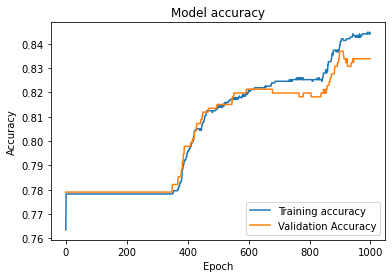

In [16]:
# plot learning curves
plt.plot(histories['model'].history['accuracy'])
plt.plot(histories['model'].history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Validation Accuracy'], loc='lower right')
plt.show()